In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sammon import sammon
from sklearn.decomposition import PCA
import matplotlib as mpl
from sklearn.manifold import Isomap
from sklearn.datasets import fetch_olivetti_faces

In [3]:
def load_from_csv(filename):
    """
    Loads a CSV file into a pandas dataframe.
    """
    return pd.read_csv(filename)

In [4]:
def load_from_npy(filename):
    """
    Loads a NPY file into a pandas dataframe.
    """
    return np.load(filename)

In [5]:
def run_PCA(data, labels, n_components=2):
    """
    Runs PCA on the data.
    """
    pca = PCA(n_components=n_components)
    principalComponents = pca.fit_transform(data)
    principalDf = pd.DataFrame(data = principalComponents)
    principalDf['label'] = labels
    return principalDf

In [17]:
def plot_stuff(train_PCA, labels, graph_label):
    """
    Plots the PCA results.
    """
    N = len(set(labels))
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    x = train_PCA[0]
    y = train_PCA[1]
    tag = labels

    cmap = plt.cm.jet
    cmpalist = [cmap(i) for i in range(cmap.N)]
    cmap = cmap.from_list('Custom cmap', cmpalist, cmap.N)

    bounds = np.linspace(0, N, N+1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    scat = ax.scatter(x, y, c=tag, cmap=cmap, norm=norm)
    cb = plt.colorbar(scat, spacing='proportional', ticks=bounds)
    cb.set_label('Custom cbar')
    ax.set_title(graph_label)
    plt.show()

In [7]:
def run_sammon(data, labels, n_components=2):
    """
    Runs Sammon on the data.
    """
    new_data = data.to_numpy()
    new_data = np.delete(new_data, -1, axis=1)
    [y_new, E] = sammon(new_data, n_components)
    y_new = pd.DataFrame(y_new)
    y_new['label'] = labels
    return y_new

In [8]:
def run_isomap(data, labels, n_components=2):
    embedding = Isomap(n_components=n_components)
    X_transformed = embedding.fit_transform(data)
    X_transformed = pd.DataFrame(X_transformed)
    X_transformed['label'] = labels
    return X_transformed

# MNIST Dataset

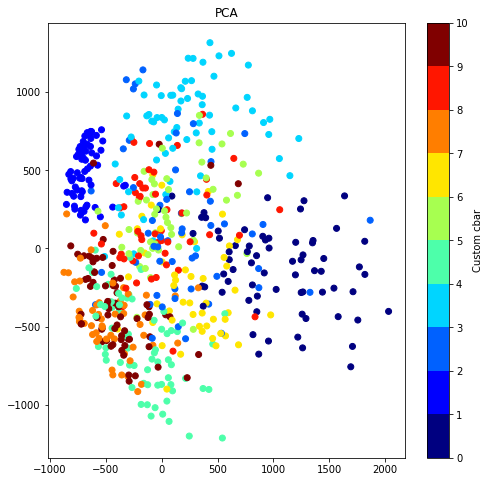

In [18]:
dataset = load_from_csv('Datasets/mnist_test.csv')
train_data = dataset.sample(n=600, random_state=42)

labels = train_data['label']

train_data = train_data.drop(columns=['label'])
train_PCA = run_PCA(train_data, labels, 2)

#PCA plot for 2 components
plot_stuff(train_PCA, labels, 'PCA')

TolFun exceeded: Optimisation terminated


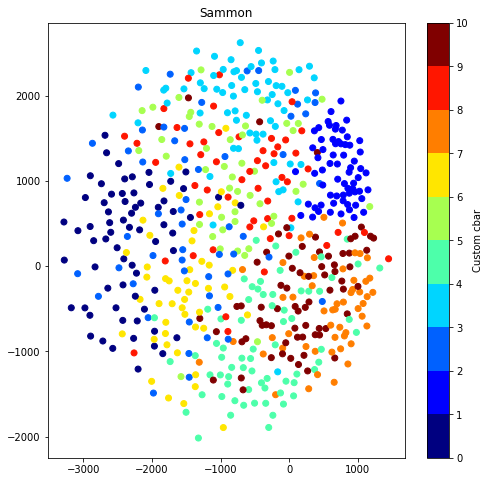

In [19]:
train_PCA = run_PCA(train_data, labels, 30)
smapping = run_sammon(train_PCA, labels, 2)
plot_stuff(smapping, labels, 'Sammon')

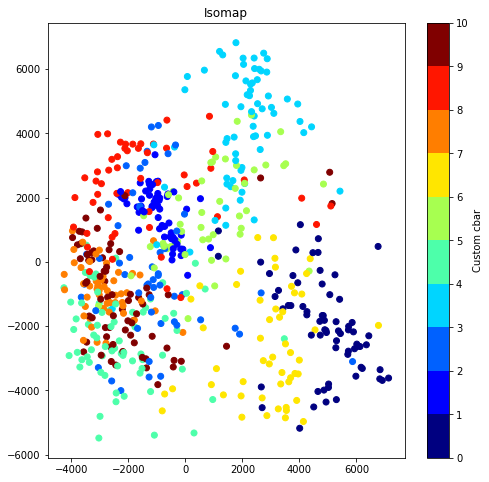

In [20]:
isomap = run_isomap(train_data, labels, 2)
plot_stuff(isomap, labels, 'Isomap')

# Olivetti Dataset

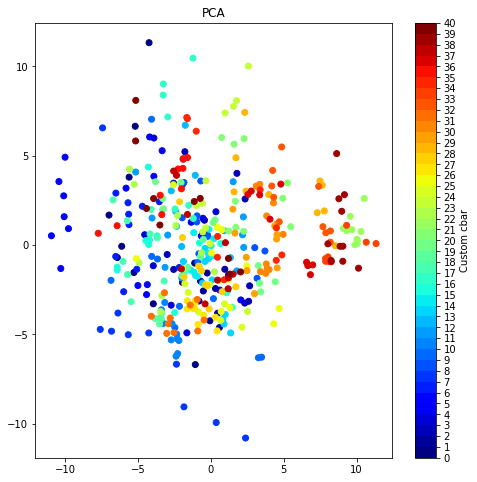

In [21]:
olivetti_dataset = fetch_olivetti_faces()

labels = np.array(olivetti_dataset["target"])

train_PCA = run_PCA(olivetti_dataset['data'], labels, 2)
#PCA plot for 2 components
plot_stuff(train_PCA, labels, 'PCA')

TolFun exceeded: Optimisation terminated


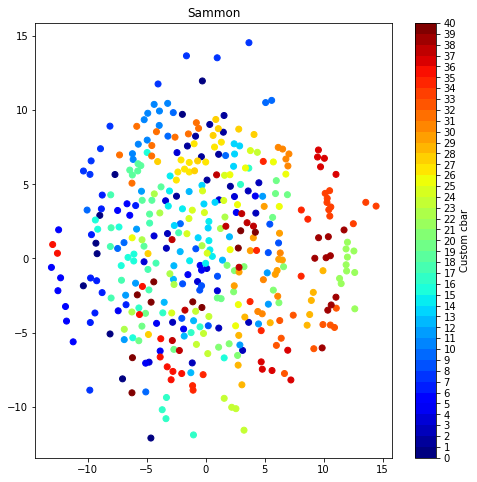

In [22]:
train_PCA = run_PCA(olivetti_dataset['data'], labels, 30)
smapping = run_sammon(train_PCA, labels, 2)
plot_stuff(smapping, labels, 'Sammon')

/home/keshav/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/keshav/.local/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:322: UserWarning: The number of connected components of the neighbors graph is 12 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/keshav/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/keshav/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.fla

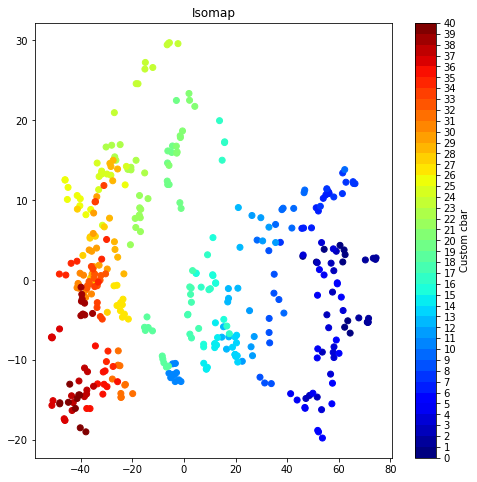

In [23]:
isomap = run_isomap(train_PCA, labels, 2)
plot_stuff(isomap, labels, 'Isomap')